In [1]:
import pandas as pd

In [2]:
# Importar libreria para dividir entrenamiento y prueba
from sklearn.model_selection import train_test_split

In [3]:
# se utiliza para el manejo de rutas y directorios.
import os

# Calculo cientifico y vectorial para python
import numpy as np

# Librerias para graficar
from matplotlib import pyplot

# Modulo de optimización de scipy
from scipy import optimize

# se utiliza para codificar variables categóricas en variables numéricas
from sklearn.preprocessing import LabelEncoder

# le dice a matplotlib que incruste gráficos en el cuaderno
%matplotlib inline

In [4]:
#Carga de dataset
data = pd.read_csv('glaucoma.csv', header=0)

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 650 entries, 0 to 649
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Filename  650 non-null    object 
 1   ExpCDR    650 non-null    float64
 2   Eye       650 non-null    object 
 3   Set       650 non-null    object 
 4   Glaucoma  650 non-null    int64  
dtypes: float64(1), int64(1), object(3)
memory usage: 25.5+ KB


In [6]:
columnas_categoricas = data.select_dtypes(include=['object']).columns

In [7]:
print(columnas_categoricas)

Index(['Filename', 'Eye', 'Set'], dtype='object')


In [8]:
#Procesamiento de frases o palabras
for columna in columnas_categoricas:
  # se crea una instancia (se utiliza para convetir categoricos a numericos)
  le = LabelEncoder()
  # cambia de categoricos a numericos unico
  data[columna] = le.fit_transform(data[columna])

In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 650 entries, 0 to 649
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Filename  650 non-null    int32  
 1   ExpCDR    650 non-null    float64
 2   Eye       650 non-null    int32  
 3   Set       650 non-null    int32  
 4   Glaucoma  650 non-null    int64  
dtypes: float64(1), int32(3), int64(1)
memory usage: 17.9 KB


In [10]:
longitud = 650 # RangeIndex
train_long = longitud - longitud * 0.2 # 20%
test_long = longitud - longitud * 0.8 # 80%
print(f'Test longitud {int(np.round(test_long))}, Train longitud {int(train_long)}')

Test longitud 130, Train longitud 520


In [11]:
# Division de dataset en entrenamiento y prueba
train_data, test_data = train_test_split(data, test_size=0.2, random_state=42)

In [12]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 520 entries, 333 to 102
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Filename  520 non-null    int32  
 1   ExpCDR    520 non-null    float64
 2   Eye       520 non-null    int32  
 3   Set       520 non-null    int32  
 4   Glaucoma  520 non-null    int64  
dtypes: float64(1), int32(3), int64(1)
memory usage: 18.3 KB


In [13]:
test_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 130 entries, 637 to 602
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Filename  130 non-null    int32  
 1   ExpCDR    130 non-null    float64
 2   Eye       130 non-null    int32  
 3   Set       130 non-null    int32  
 4   Glaucoma  130 non-null    int64  
dtypes: float64(1), int32(3), int64(1)
memory usage: 4.6 KB


In [14]:
train_data.to_csv("train.csv", index=False) # crear los csv

In [15]:
test_data.to_csv("test.csv", index=False) # crear los csv

In [16]:
#Carga de dataset
data = pd.read_csv('train.csv') # entrenamiento

In [17]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 520 entries, 0 to 519
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Filename  520 non-null    int64  
 1   ExpCDR    520 non-null    float64
 2   Eye       520 non-null    int64  
 3   Set       520 non-null    int64  
 4   Glaucoma  520 non-null    int64  
dtypes: float64(1), int64(4)
memory usage: 20.4 KB


In [18]:
X = data.iloc[:, :4]
y = data.iloc[:, 4]
m = y.size

In [19]:
print(X)
print('*'*25)
print(y)

     Filename  ExpCDR  Eye  Set
0         333  0.6623    0    1
1          29  0.6761    1    0
2         553  0.5762    0    1
3         286  0.5333    1    0
4         425  0.6375    0    0
..        ...     ...  ...  ...
515        71  0.6257    0    1
516       106  0.4789    1    1
517       270  0.5339    1    1
518       435  0.4516    0    0
519       102  0.6043    0    0

[520 rows x 4 columns]
*************************
0      0
1      0
2      0
3      0
4      1
      ..
515    1
516    0
517    0
518    0
519    0
Name: Glaucoma, Length: 520, dtype: int64


In [20]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 520 entries, 0 to 519
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Filename  520 non-null    int64  
 1   ExpCDR    520 non-null    float64
 2   Eye       520 non-null    int64  
 3   Set       520 non-null    int64  
 4   Glaucoma  520 non-null    int64  
dtypes: float64(1), int64(4)
memory usage: 20.4 KB


<a id="section1"></a>
### 1.2 Implementacion

#### 1.2.1 Fución Sigmoidea

La hipotesis para la regresión logistica se define como:

$$ h_\theta(x) = g(\theta^T x)$$

donde la función $g$ is la función sigmoidea. La función sigmoidea se define como:

$$g(z) = \frac{1}{1+e^{-z}}$$.

Los resultados que debe generar la funcion sigmoidea para valores positivos amplios de `x`, deben ser cercanos a 1, mientras que para valores negativos grandes, la sigmoide debe generar valores cercanos 0. La evaluacion de `sigmoid(0)` debe dar un resultado exacto de 0.5. Esta funcion tambien debe poder trabajar con vectores y matrices.

In [21]:
# z === 0tx === 00x0 + 01x1
# una probabilidad entre 0 a 1
def sigmoid(z):
    # Calcula la sigmoide de una entrada z
    # Convierte la entrada a un arreglo numpy
    z = np.array(z)

    # Limita los valores de z para evitar overflow
    z = np.clip(z, -500, 500)

    g = 1 / (1 + np.exp(-z))

    return g

In [39]:
# Prueba la implementacion de la funcion sigmoid
z = 1
g = sigmoid(z)

print('g(', z, ') = ', g)

g( 1 ) =  0.7310585786300049


In [40]:
def  featureNormalize(X):
    # Se crea una copia del conjunto de datos X para evitar modificar los datos originales.
    X_norm = X.copy()
    # se crea un arreglo de 0 para almacenar la media y desviacion estandar
    mu = np.zeros(X.shape[1])
    sigma = np.zeros(X.shape[1])

    # media
    mu = np.mean(X, axis = 0)
    # desviacion estandar
    sigma = np.std(X, axis = 0)
    X_norm = (X - mu) / sigma

    return X_norm, mu, sigma

In [24]:
# llama featureNormalize con los datos cargados
X_norm, mu, sigma = featureNormalize(X)

print(X)
print('*'*20)
print('Media calculada:', mu)
print('*'*20)
print('Desviación estandar calculada:', sigma)
print('*'*20)
print(X_norm)

     Filename  ExpCDR  Eye  Set
0         333  0.6623    0    1
1          29  0.6761    1    0
2         553  0.5762    0    1
3         286  0.5333    1    0
4         425  0.6375    0    0
..        ...     ...  ...  ...
515        71  0.6257    0    1
516       106  0.4789    1    1
517       270  0.5339    1    1
518       435  0.4516    0    0
519       102  0.6043    0    0

[520 rows x 4 columns]
********************
Media calculada: Filename    329.886538
ExpCDR        0.572330
Eye           0.494231
Set           0.498077
dtype: float64
********************
Desviación estandar calculada: Filename    186.858237
ExpCDR        0.116461
Eye           0.499967
Set           0.499996
dtype: float64
********************
     Filename    ExpCDR       Eye       Set
0    0.016662  0.772531 -0.988527  1.003854
1   -1.610240  0.891025  1.011606 -0.996161
2    1.194025  0.033228 -0.988527  1.003854
3   -0.234865 -0.335135  1.011606 -0.996161
4    0.509014  0.559584 -0.988527 -0.996161
.. 

In [25]:
# Configurar la matriz adecuadamente, y agregar una columna de unos que corresponde al termino de intercepción.
m, n = X.shape
print(m)
print(n)
# Agrega el termino de intercepción a A
X = np.concatenate([np.ones((m, 1)), X_norm], axis=1)

print(X)

520
4
[[ 1.          0.01666216  0.77253093 -0.98852734  1.00385358]
 [ 1.         -1.61023963  0.89102542  1.0116058  -0.99616121]
 [ 1.          1.1940253   0.03322833 -0.98852734  1.00385358]
 ...
 [ 1.         -0.32049183 -0.32998306  1.0116058   1.00385358]
 [ 1.          0.56253052 -1.03665674 -0.98852734 -0.99616121]
 [ 1.         -1.21956914  0.27451059 -0.98852734 -0.99616121]]


In [26]:
def calcularCosto(theta, X, y):
    # Inicializar algunos valores utiles
    m = y.size  # numero de ejemplos de entrenamiento
    #epsilon = 1e-8

    J = 0
    h = sigmoid(X.dot(theta.T))

    epsilon = 1e-10  # Un valor pequeño para evitar divisiones por cero 0.0000000000001
    J = (1 / m) * np.sum(-y.dot(np.log(h + epsilon)) - (1 - y).dot(np.log(1 - h + epsilon)))

    # J = (1 / m) * np.sum(-y.dot(np.log(h)) - (1 - y).dot(np.log(1 - h)))

    return J

In [27]:
def descensoGradiente(theta, X, y, alpha, num_iters):
    # Inicializa algunos valores
    m = y.shape[0] # numero de ejemplos de entrenamiento

    # realiza una copia de theta, el cual será acutalizada por el descenso por el gradiente
    theta = theta.copy()
    J_history = []

    for i in range(num_iters):
        h = sigmoid(X.dot(theta.T))
        theta = theta - (alpha / m) * (h - y).dot(X)

        J_history.append(calcularCosto(theta, X, y))
    return theta, J_history

In [28]:
data = pd.read_csv('test.csv')
print(data)

     Filename  ExpCDR  Eye  Set  Glaucoma
0         637  0.5253    1    1         1
1         220  0.5699    1    1         0
2         428  0.7116    1    1         1
3         326  0.8824    0    1         1
4          72  0.5341    0    0         0
..        ...     ...  ...  ...       ...
125       515  0.8495    1    0         1
126       375  0.4930    1    1         0
127       369  0.5351    1    0         0
128       244  0.5914    1    1         1
129       602  0.6651    0    0         0

[130 rows x 5 columns]


In [46]:
fila_deseada = 98

if fila_deseada < len(data):
  fila_completa = data.iloc[fila_deseada].tolist()
  print(fila_completa)
else:
  print("La fila no existe")

[268.0, 0.758, 1.0, 1.0, 1.0]


theta calculado por el descenso por el gradiente: [-1.57030729  0.60474854  1.54484456  0.22810136 -0.04981762]
0.7554881543162257


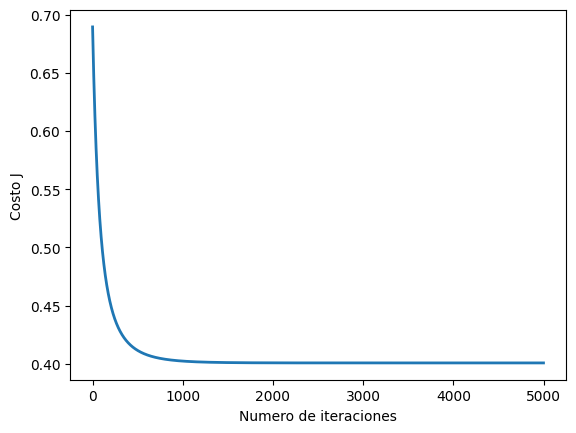

In [30]:
# Elegir algun valor para alpha (probar varias alternativas)
alpha = 0.03 #0.001
num_iters = 5000 # 100

# inicializa theta y ejecuta el descenso por el gradiente
theta = np.zeros(5)
theta, J_history = descensoGradiente(theta, X, y, alpha, num_iters)

# Grafica la convergencia del costo
pyplot.plot(np.arange(len(J_history)), J_history, lw=2)
pyplot.xlabel('Numero de iteraciones')
pyplot.ylabel('Costo J')

# Muestra los resultados del descenso por el gradiente
print('theta calculado por el descenso por el gradiente: {:s}'.format(str(theta)))

X_array = [1, 448.0, 0.5341, 0.0, 1.0]
# normalizando el X_array
mean = np.mean(X_array)
std = np.std(X_array)
X_array = (X_array - mean) / std
#normalizado

z = np.dot(X_array, theta) #0*x
probability = sigmoid(z)

print(probability)

# print(f" (usando el descenso por el gradiente):{aprueba}")
#0.9124981079062219

In [31]:
def costFunction(theta, X, y):
    # Inicializar algunos valores utiles
    m = y.size  # numero de ejemplos de entrenamiento
# 
    J = 0
    grad = np.zeros(theta.shape)

    h = sigmoid(X.dot(theta.T))

    epsilon = 1e-10  # Un valor pequeño para evitar divisiones por cero
    J = (1 / m) * np.sum(-y.dot(np.log(h + epsilon)) - (1 - y).dot(np.log(1 - h + epsilon)))
    grad = (1 / m) * (h - y).dot(X)

    return J, grad

In [32]:
# Inicializacion de parametros de ajuste
initial_theta = np.zeros(n+1)
print(initial_theta)
cost, grad = costFunction(initial_theta, X, y)
print('Costo en theta inicial (zeros): {:.3f}'.format(cost))
print('Costo esperado (aproximado): 0.693\n')
print(grad)

[0. 0. 0. 0. 0.]
Costo en theta inicial (zeros): 0.693
Costo esperado (aproximado): 0.693

[ 0.24230769 -0.11420838 -0.21996373 -0.02220562 -0.02791441]


In [33]:
# Calcula y muestra el costo y el gradiente con valores de theta diferentes a cero

test_theta = np.array([0.12079063,  0.00222171,  0.00127091, -0.01065619,  0.00455323])
#test_theta = np.array([-11.74749157, 0.09927308, 0.09316497])
print(test_theta)
cost, grad = costFunction(test_theta, X, y)

print('Costo en theta prueba: {:.3f}'.format(cost))
print('Costo esperado (aproximado): 11.301\n')

print('Gradiente en theta prueba:')
print('\t[{:.3f}, {:.3f}, {:.3f}]'.format(*grad))
print('Gradiente esperado (aproximado):\n\t[0.150, 0.003, 0.001]')

[ 0.12079063  0.00222171  0.00127091 -0.01065619  0.00455323]
Costo en theta prueba: 0.724
Costo esperado (aproximado): 11.301

Gradiente en theta prueba:
	[0.272, -0.114, -0.219]
Gradiente esperado (aproximado):
	[0.150, 0.003, 0.001]


In [47]:
# Establecer las opciones para optimize.minimize
options= {'maxiter': 1000} # diccionario donde estamos diciendop que haga 1000 iteraciones
# options= {}

# revisar la documentacion de scipy's optimize.minimize para mayor descripcion de los parametros
# La funcion devuekve un objeto `OptimizeResult`
# Se utiliza el algoritmo de Newton truncado para la optimización.
res = optimize.minimize(costFunction,
                        initial_theta,
                        (X, y),
                        jac=True, #Indica que la función de costo también proporciona el gradiente.
                        method='TNC', #  Se utiliza el método de optimización de Newton truncado (TNC).
                        options=options)

# la propiedad fun del objeto devuelto por `OptimizeResult`
# contiene el valor del costFunction de un theta optimizado
cost = res.fun

# Theta optimizada esta en la propiedad x
theta = res.x

# Imprimir theta en la pantalla
print('Costo con un valor de theta encontrado por optimize.minimize: {:.3f}'.format(cost))
print('Costo esperado (aproximado): 0.218\n');

print('theta:')
print('\t[{:.3f}, {:.3f}, {:.3f}]'.format(*theta))
print('Theta esperado (aproximado):\n\t[-1.803, 0.022, -0.066]')

Costo con un valor de theta encontrado por optimize.minimize: 0.401
Costo esperado (aproximado): 0.218

theta:
	[-1.571, 0.605, 1.545]
Theta esperado (aproximado):
	[-1.803, 0.022, -0.066]


C:\Users\Franz\AppData\Local\Temp\ipykernel_1560\4182574842.py:8: OptimizeWarning: Unknown solver options: maxiter
  res = optimize.minimize(costFunction,


In [35]:
def plotData(X, y):
    # Gragica los puntos de datos X y y en una nueva figura. Grafica los puntos de datos con * para los positivos y
    # o para los negativos.

    # Crea una nueva figura
    fig = pyplot.figure()

    # Find Indices of Positive and Negative Examples
    pos = y == 1
    neg = y == 0

    # Plot Examples
    pyplot.plot(X[pos, 0], X[pos, 1], 'k*', lw=2, ms=10)
    pyplot.plot(X[neg, 0], X[neg, 1], 'ko', mfc='y', ms=8, mec='k', mew=1)

In [36]:
def plotDecisionBoundary(plotData, theta, X, y):
    """
    Grafica los puntos X y Y en una nueva figura con un limite de desicion definido por theta.
    the data points X and y into a new figure with the decision boundary defined by theta.
    Grafica los puntos con * para los ejemplos positivos y con o para los ejemplos negativos.

    Parametros:
    ----------
    plotData : func
        A function reference for plotting the X, y data.

    theta : array_like
        Parametros para la regresion logistica. Un vecto de la forma (n+1, ).

    X : array_like
        Data set de entrada. Se supone que X es una de las siguientes:
            1) Matriz Mx3, donde la primera columna es una columna de unos para intercepción.
            2) Matriz MxN, N> 3, donde la primera columna son todos unos.

    y : array_like
        Vector de datos de etiquetas de la forma (m, ).
    """
    # hacer que theta sera un arreglo numpy
    theta = np.array(theta)
      # Graficar los datos (recordar que la primera columna en X es la intercepción)
    plotData(X[:, 1:3], y)

    if X.shape[1] <= 3:
        # Solo se requieren 2 puntos para definir una linea, para lo cual se eligen dos puntos finales
        plot_x = np.array([np.min(X[:, 1]) - 2, np.max(X[:, 1]) + 2])

        # Calcular la línea límite de decisión
        plot_y = (-1. / theta[2]) * (theta[1] * plot_x + theta[0])

        # Graficar la línea límite de decisión
        pyplot.plot(plot_x, plot_y)

        # Leyenda, específica para el ejercicio
        pyplot.legend(['Aceptado', 'No aceptado', 'Límite de decisión'])
        pyplot.xlim([30, 100])
        pyplot.ylim([30, 100])
    else:
       # Rango de la grilla
        u = np.linspace(-1, 1.5, 50)
        v = np.linspace(-1, 1.5, 50)

        z = np.zeros((len(u), len(v)))
        # Evaluar z = theta*x sobre la grilla
        for i, ui in enumerate(u):
            for j, vj in enumerate(v):
                z[i, j] = np.dot(mapFeature(ui, vj), theta)

        z = z.T  # Importante transponer z antes de llamar al contorno

        # Plot z = 0 como contorno y z < 0 como región negativa
        pyplot.contour(u, v, z, levels=[0], linewidths=2, colors='g')
        pyplot.contourf(u, v, z, levels=[np.min(z), 0, np.max(z)], cmap='Greens', alpha=0.4)


NameError: name 'mapFeature' is not defined

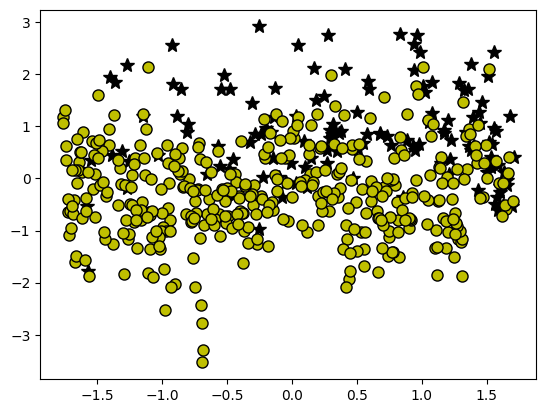

In [37]:
# Graficar limites
plotDecisionBoundary(plotData, theta, X, y)

In [49]:
def predict(theta, X):
    """
    Predecir si la etiqueta es 0 o 1 mediante regresión logística aprendida.
    Calcula las predicciones para X usando un umbral en 0.5 (es decir, si sigmoide (theta.T * x)> = 0.5, predice 1)

    Parametros
    ----------
    theta : array_like
        Parametros para regresion logistica. Un vecto de la forma (n+1, ).

    X : array_like
        Datos utilizados para el calculo de las predicciones.
        La fila es el numero de los puntos para calcular las predicciones,
        y las columnas con el numero de caracteristicas.

    Devuelve
    -------
    p : array_like
        Predicciones y 0 o 1 para cada fila en X.
    """
    m = X.shape[0] # Numero de ejemplo de entrenamiento

    p = np.zeros(m)

    p = np.round(sigmoid(X.dot(theta.T)))
    return p

In [50]:
#  Predice la probabilidad de ingreso para un estudiante con nota de 45 en el examen 1 y nota de 85 en el examen 2
prob = sigmoid(np.dot([1, 448.0, 0.5341, 0.0, 1.0], theta))
print (prob)
# print('Para un estudiante con notas de 45 y 85, se predice una probabilidad de admisión de: {:.3f}%'.format(prob))
# print('Valor esperado: 0.775 +/- 0.002\n')

# Compute accuracy on our training set
p = predict(theta, X)
print('Precisión de entrenamiento: {:.2f} %'.format(np.mean(p == y) * 100))
# print('Precisión esperada (aproximadamente): 92.04 %')

1.0
Precisión de entrenamiento: 81.15 %
